rm: cannot remove 'nodes/.DS_Store': No such file or directory
zsh:1: no matches found: nodes/*tetra*.cif
rm: cannot remove 'edges/.DS_Store': No such file or directory
center is a cycle
tritopic/tetratopic/multitopic: center is a cycle
find connected X in edge frag 33 30 20
find connected X in edge frag 39 36 23
find connected X in edge frag 45 42 22
find connected X in edge frag 27 24 21


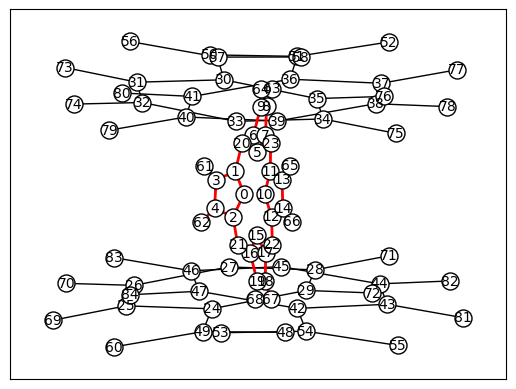


template : she.cif

Number of vertices =  20
Number of edges =  48

*****************************************************************
RMSD of the compatible node BBs with assigned vertices:          
*****************************************************************

vertex Er (6 connected)
     6c_Al_1.cif deviation = 0.64872 (outside tolerance)
     MIL-53.cif deviation = 0.59159 (outside tolerance)
     6c_Zr_1_Ch_dummy.cif deviation = 0.35973 (within tolerance)
     6c_Al_1_Ch.cif deviation = 0.63493 (outside tolerance)
* 1 compatible building blocks out of 4 available for node Er *
vertex V (4 connected)
     tetracenter.cif deviation = 0.00506 (within tolerance)
* 1 compatible building blocks out of 1 available for node V *

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vertex assignment :  ['v1-tetracenter.cif', 'v2-6c_Zr_1_Ch_dummy.cif']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+

<class 'networkx.utils.decorators.argmap'> compilation 80:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [1]:
from MOF_builder.tetratopic import MOF_tetra
import numpy as np
import veloxchem as vlx
from frag_recognizer import process_linker_molecule


template = 'she.cif' #lib file 
node_connection= 6   #lib file 
linker_topic = 4
linker_file = 'CoTCPP.xyz'

#######################################################################
! rm nodes/.DS_Store
! rm nodes/*tetra*.cif
! rm edges/.DS_Store
! rm edges/*.cif
molecule = vlx.Molecule.read_xyz_file(linker_file)
process_linker_molecule(molecule,linker_topic)

templates_dir = '../data/template_database' #default 
nodes_dir = 'nodes' #default 
edges_dir = 'edges' #default 
new_mof = MOF_tetra(templates_dir,nodes_dir,edges_dir,template,node_connection)
new_mof.load(False)

In [2]:
#from output import temp_xyz
#temp_xyz('40test.xyz',new_mof.all_connected_node_edge_cc[new_mof.all_connected_node_edge_cc[:,5]==1])

In [3]:
supercell= np.asarray([0,0,0])
new_mof.basic_supercell(supercell,term_file = '../data/methyl.pdb')
new_mof.write_basic_supercell('41.gro','42.xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
#scalar parameter to adjust boundary 
new_mof.basic_supercell(supercell,scalar=0.05,boundary_scalar=0.16,term_file = '../data/methyl.pdb')
new_mof.write_basic_supercell('43.gro','44.xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
new_mof.defect_missing([1,2,3],[1,2,3])
new_mof.term_defective_model(n_term_file = '../data/methyl.pdb',e_termfile = '../data/CCO2H2.pdb')
new_mof.write_tntemof('45.gro')

/Users/chenxili/miniconda/envs/vlx/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chenxili/miniconda/envs/vlx/lib/python3.11/site-packages/numpy/core/_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


this MOF has 4 seperated fragments: [38, 1, 1, 1]
UNsaturated edges(linkers) exist, need linker_termination <= 10
UNsaturated nodes exist, <=23 nodes need node_termination
degree of edge E6 is 3, neighbor nodes are [5, 17, 19]
degree of edge E7 is 3, neighbor nodes are [5, 16, 20]
degree of edge E8 is 3, neighbor nodes are [6, 12, 22]
degree of edge E10 is 3, neighbor nodes are [5, 18, 25]
degree of edge E13 is 3, neighbor nodes are [6, 12, 25]
degree of edge E14 is 3, neighbor nodes are [7, 10, 20]
degree of edge E18 is 3, neighbor nodes are [8, 9, 19]
6 4
7 4
8 8
10 8
13 4
14 8
18 4


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
#SUB
sub_file = 'TETRA_SUB.pdb'
sub_class = 'HEDGE' #HHEDGE HHHEDGE EDGE
candidate_res_idx_list = [6,7,8,9,14,18] #10,13
sub_res_newname = 'SUB'
new_mof.defect_replace_linker(sub_file,sub_class,candidate_res_idx_list)
new_mof.write_view_replaced('46.gro')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.